In [1]:
import math as m 
import pandas as pd 
import numpy as np 
from scipy import integrate 
import numpy.testing as npt 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [58]:
class Norm_rv:
    
    def __init__(self, mean, variance, crit_value=0.0):
        
        """
        constructor to initialize a normal random variable with mean mu and variance sigma^2. 
        """
        
        self.mean = float(mean)
        self.sigma = float(m.sqrt(variance))  
        if variance < np.inf:
            self.variance = variance 
        else: 
            raise ValueError('Enter a finite variance')
        self.crit_value = float(crit_value) 
        self.x_range = np.linspace(-10, 10, 2000)
        
    def __repr__(self):
        return f"Normal distribution with mean {self.mean}, variance {self.variance}, and critical value {self.crit_value}"
    
    def pdf(self):
        
        """
        this is the probability density function (pdf) of a normal distribution with mean mu and 
        variance sigma^2. To check that it is, in fact, a pdf, the y values must sum to 1. This 
        would theoretically be the integral from -infty to infty but is approximated here with a sum. 
        """
        
        return (1/(self.sigma*m.sqrt(2*m.pi)))*m.e**((-1/2)*((self.x_range-self.mean)/self.sigma)**2)
        npt.assert_equal(1, round(sum(self.pdf),2)) 
        
    # fill function is filling the entire plot and not a certain area 
    def plot_pdf(self, cv_probability=False): 
        
        """
        this function takes a given normal random variable, uses the pdf that was previously calculated,
        and plots it.
        """
        
        plt.title(self.__repr__())
        plt.plot(self.x_range, self.pdf(),linestyle='dashed', color='blue',linewidth=3)
        if cv_probability==False:
            plt.fill_betweenx(self.pdf(), self.x_range, x2=self.mean,
                          where=(self.x_range<self.mean), color='navy', alpha=0.3)
        else: 
            plt.fill_betweenx(self.pdf(), self.x_range, x2=self.crit_value,
                          where=(self.x_range<self.crit_value), color='navy', alpha=0.3)
        plt.tight_layout() 
        plt.show() 
        
    def probability_calc(self):
        f = lambda x: (1/(self.sigma*m.sqrt(2*m.pi)))*m.e**((-1/2)*((x-self.mean)/self.sigma)**2)
        self.probability, self.error_est = integrate.quad(f,-np.inf,self.crit_value)
        return f"The probability of x < critical_value is {round(self.probability,5)} with an error estimate of {round(error_est,5)}"

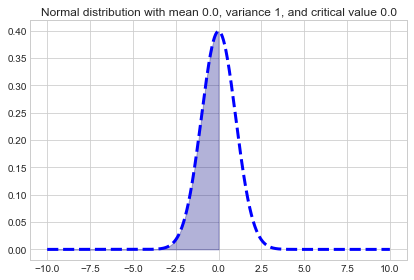

'The probability of x < critical_value is 0.5 with an error estimate of 0.0'

In [59]:
#a standard normal r.v. (E(x)=0, Var(x)=1)
a = Norm_rv(0,1)
a.plot_pdf() 
a.probability_calc()

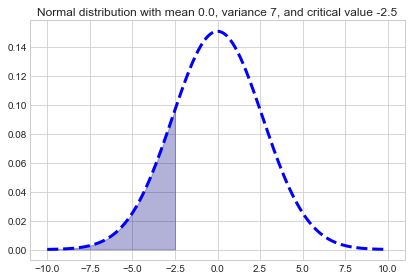

'The probability of x < critical_value is 0.17235 with an error estimate of 0.0'

In [62]:
# mean = 0, variance = 7, and a critical value of -2.5
b = Norm_rv(0,7,-2.5) 
b.plot_pdf(cv_probability=True)
b.probability_calc()